<a href="https://colab.research.google.com/github/SafiullinFanil/lab-3_2/blob/main/lab3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ансамбль деревьев

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df=pd.read_csv("1_breast_cancer.csv")

In [ ]:
df = df.drop('id', axis = 1) 
df = df.drop('Unnamed: 32', axis = 1) 

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 31)

In [ ]:
y = df['diagnosis'] 
df = df.drop('diagnosis', axis = 1) 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [ ]:
y_train = y_train == 'B'
y_train = y_train.astype(int)
y_test = y_test == 'B'
y_test = y_test.astype(int)

### 3. Случайный лес

Случайный лес помимо бэггинга над деревьями использует метод случайных подпространств. При построении разбиения в каждой вершине каждого дерева используются не все признаки, а лишь случайное подмножество призкаков. Это необходимо, чтобы ответы на построенных деревьях меньше коррелировали между собой.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
clf = RandomForestRegressor(n_estimators=100, max_features=0.2)

In [ ]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, clf.predict(X_test))

0.0410041958041958

Получили улучшение метрики

### 4. Зависимость качества от числа деревьев 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Q = []
for n_est in range(1, 200, 2):
  clf = RandomForestRegressor(n_estimators=n_est, max_features=0.2)
  clf.fit(X_train, y_train)
  Q.append(mean_squared_error(y_test, clf.predict(X_test)))


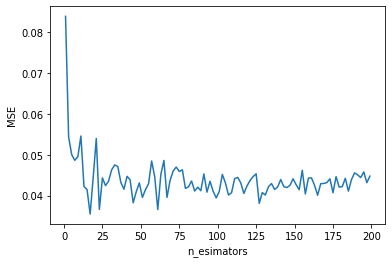

In [ ]:
plt.plot(range(1, 200, 2), Q)
plt.xlabel('n_esimators')
plt.ylabel('MSE')
plt.show()

### 5. Зависимость качества от гиперпарамерта max_features

In [ ]:
Q = []
for max_feat in range(1, 10):
  clf = RandomForestRegressor(n_estimators=100, max_features=max_feat)
  clf.fit(X_train, y_train)
  Q.append(mean_squared_error(y_test, clf.predict(X_test)))


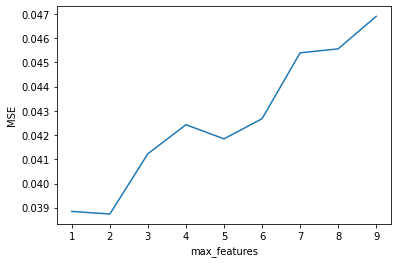

In [ ]:
plt.plot(range(1, 10), Q)
plt.xlabel('max_features')
plt.ylabel('MSE')
plt.show()

## 6. Важность признаков

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
#Метод RandomForestRegressor умеет считать важность параметров
clf = RandomForestRegressor(n_estimators=100, max_features=0.2)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
clf.feature_importances_

array([0.03504539, 0.01392249, 0.03852146, 0.0369215 , 0.00776494,
       0.00626927, 0.04714722, 0.08881477, 0.00594762, 0.00553208,
       0.01524988, 0.00237042, 0.01118423, 0.03349871, 0.00328275,
       0.00306442, 0.00411495, 0.00468461, 0.00333526, 0.00523869,
       0.20085523, 0.01656874, 0.13156604, 0.14391245, 0.0105178 ,
       0.01562438, 0.03004312, 0.06450827, 0.00912251, 0.00537081])

In [ ]:
#создаем df в виде {"a":[1,2,3], "b":[1,4,5]}
feature_imp = pd.DataFrame({'importances': clf.feature_importances_, 'name':list(df.columns) })

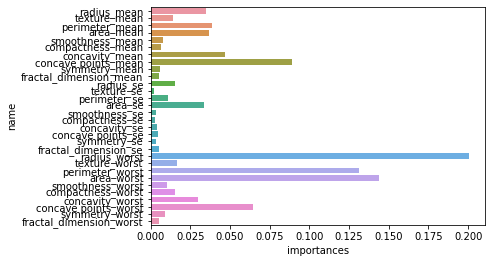

In [ ]:
sns.barplot(x="importances", y="name", data=feature_imp)

In [ ]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')